# SunbaseData ML Intern Asssignment

## **Assignment Title** : Customer Churn Prediction

## Assignment Description:
At Sunbase, we prioritize understanding our customers and ensuring their satisfaction. To achieve this,
we want to develop a machine learning model that predicts customer churn. Your task as a Machine
Learning Intern is to work on this project, following the guidelines and responsibilities outlined in the job
description.

## Objective:
Develop a machine learning model to predict customer churn based on historical customer data. You
will follow a typical machine learning project pipeline, from data preprocessing to model deployment.

## Data:
You are provided with a dataset containing historical customer information, including customer
attributes, interactions, and whether they churned or not. The dataset is in CSV format.

Author - Sarthak Sharma

In [7]:
# ! pip install catboost

In [8]:
# Import Dependencies
import pandas as pd
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [9]:
df = pd.read_excel("/content/drive/MyDrive/Data/customer_churn_large_dataset.xlsx")
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [10]:
# Check shape
df.shape

(100000, 9)

## Data Preprocessing


In [11]:
df["Name"].value_counts()

Customer_1         1
Customer_66651     1
Customer_66673     1
Customer_66672     1
Customer_66671     1
                  ..
Customer_33332     1
Customer_33331     1
Customer_33330     1
Customer_33329     1
Customer_100000    1
Name: Name, Length: 100000, dtype: int64

In [12]:
# Check Null/Missing values in dataset
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

Great! There is no missing values in our dataset

In [13]:
# Check datatypes of each column in dataset
df.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

## Convert the categorical column to numerical column

In [14]:
df["Gender"].value_counts()

Female    50216
Male      49784
Name: Gender, dtype: int64

In [15]:
# Gender
Gender = {"Male" : 1, "Female" : 0}
df["Gender"] = df["Gender"].map(Gender)

In [16]:
# Location
df["Location"].unique()

array(['Los Angeles', 'New York', 'Miami', 'Chicago', 'Houston'],
      dtype=object)

In [17]:
df1 = df.groupby(["Location"])["Churn"].value_counts().sort_values().unstack()

In [18]:
df1[1].sort_values(ascending = False).index


Index(['Miami', 'New York', 'Chicago', 'Houston', 'Los Angeles'], dtype='object', name='Location')

In [19]:
Location = {'Miami' : 1, 'New York' : 2, 'Chicago' : 3, 'Houston' : 4, 'Los Angeles' : 5}
df["Location"] = df["Location"].map(Location)

Drop the CustomerID and Name column because they both are not give relvant information for our task

In [20]:
df.drop(["CustomerID", "Name"], axis=1, inplace = True)

In [21]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,1,5,17,73.36,236,0
1,62,0,2,1,48.76,172,0
2,24,0,5,5,85.47,460,0
3,36,0,1,3,97.94,297,1
4,46,0,1,19,58.14,266,0


 Check Outliers

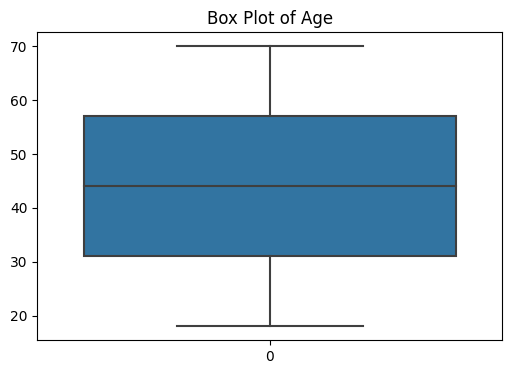

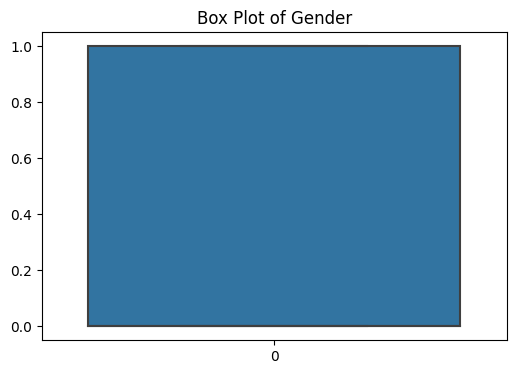

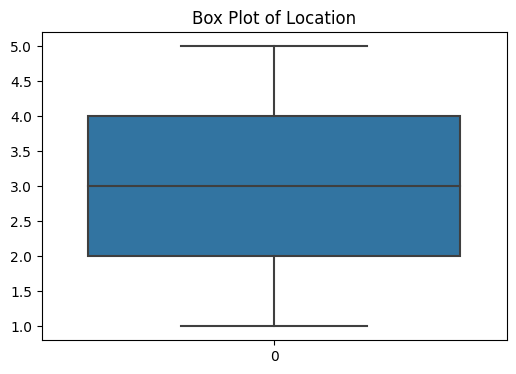

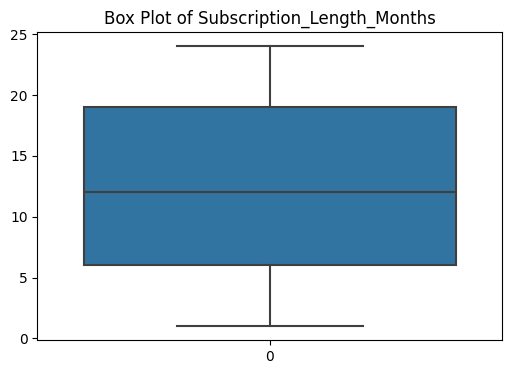

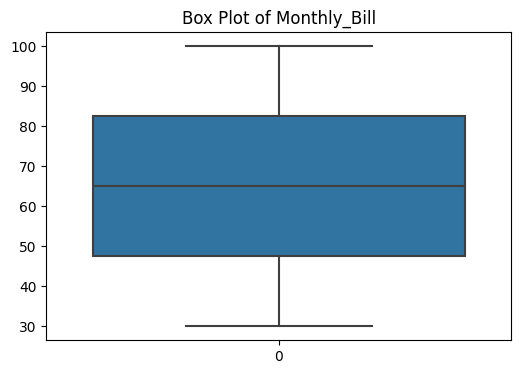

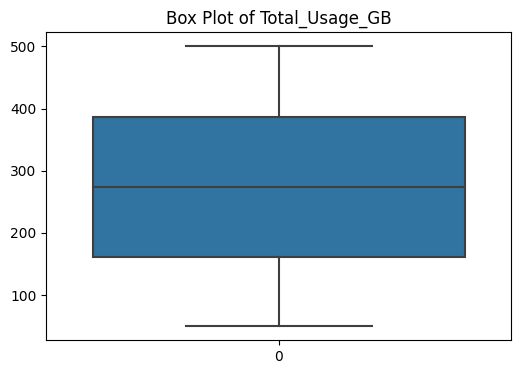

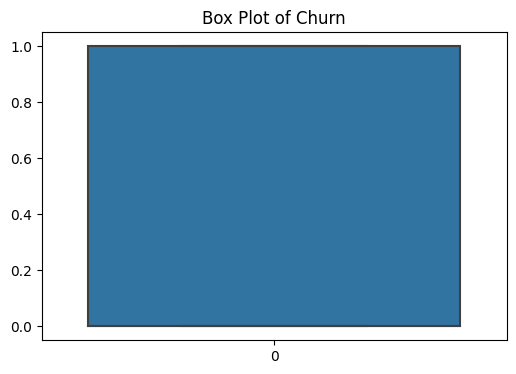

In [22]:
# Check Outliers
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plots for each column using a for loop
for column in df.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df[column])
    plt.title(f"Box Plot of {column}")
    plt.show()

Also, There is no Outliers in our dataset

## Feature Engineering

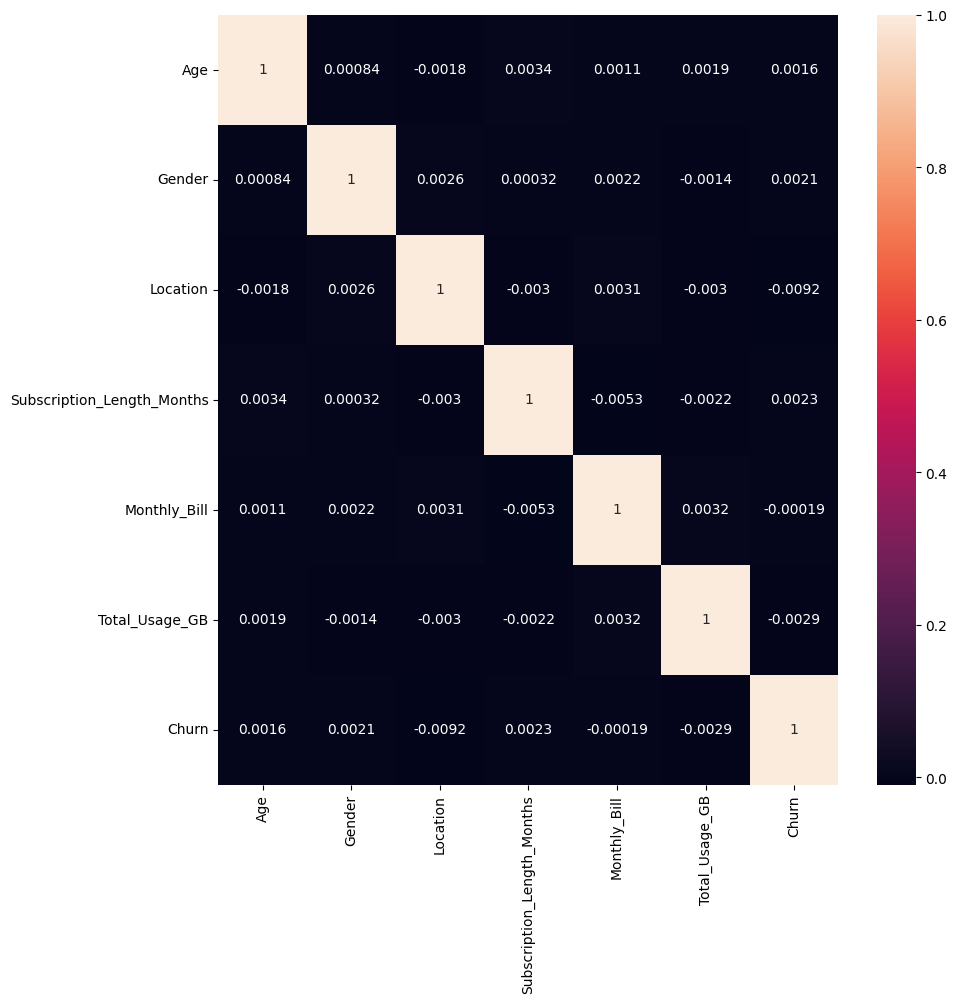

In [23]:
#Feature Engineering
# Plot the heatmap for check which feature is important for our task
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(10,10))
g=sns.heatmap(corrmat,annot=True)

As we can see every feature is important for our dataset and there is no multicollinearity in our dataset

## Model Creating and Training

**Machine Learning Approach**

We have to train the mutiple classification models on our dataset and check which is perform well on our dataset

In [24]:
! pip install catboost

In [25]:
# Split the data into Independent and Dependent feature
X = df.drop("Churn", axis = 1)
Y = df["Churn"]

# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, stratify = Y, random_state = 0)

In [26]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


CatBoost Classifier

In [27]:
! pip install catboost

In [28]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(iterations=2000, eval_metric = "AUC")
cat.fit(X_train_scaled, y_train)

Learning rate set to 0.035441
0:	total: 60.8ms	remaining: 2m 1s
1:	total: 73.2ms	remaining: 1m 13s
2:	total: 87.4ms	remaining: 58.2s
3:	total: 101ms	remaining: 50.3s
4:	total: 113ms	remaining: 45.2s
5:	total: 126ms	remaining: 42s
6:	total: 141ms	remaining: 40.2s
7:	total: 157ms	remaining: 39.2s
8:	total: 170ms	remaining: 37.6s
9:	total: 197ms	remaining: 39.3s
10:	total: 212ms	remaining: 38.3s
11:	total: 225ms	remaining: 37.3s
12:	total: 239ms	remaining: 36.5s
13:	total: 253ms	remaining: 35.9s
14:	total: 267ms	remaining: 35.3s
15:	total: 276ms	remaining: 34.3s
16:	total: 288ms	remaining: 33.6s
17:	total: 301ms	remaining: 33.2s
18:	total: 314ms	remaining: 32.7s
19:	total: 327ms	remaining: 32.4s
20:	total: 339ms	remaining: 32s
21:	total: 352ms	remaining: 31.7s
22:	total: 361ms	remaining: 31s
23:	total: 375ms	remaining: 30.8s
24:	total: 387ms	remaining: 30.6s
25:	total: 402ms	remaining: 30.5s
26:	total: 416ms	remaining: 30.4s
27:	total: 429ms	remaining: 30.2s
28:	total: 442ms	remaining: 30

In [29]:
y_pred = cat.predict(X_test_scaled)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[5441 4603]
 [5378 4578]]
0.50095
              precision    recall  f1-score   support

           0       0.50      0.54      0.52     10044
           1       0.50      0.46      0.48      9956

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



RandomForest

In [30]:
rf=RandomForestClassifier()
rf.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [31]:
y_pred1 = rf.predict(X_test_scaled)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[5313 4731]
 [5405 4551]]
0.4932
              precision    recall  f1-score   support

           0       0.50      0.53      0.51     10044
           1       0.49      0.46      0.47      9956

    accuracy                           0.49     20000
   macro avg       0.49      0.49      0.49     20000
weighted avg       0.49      0.49      0.49     20000



Logistic Regression

In [32]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

In [33]:
y_pred2 = logreg.predict(X_test_scaled)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[6208 3836]
 [6157 3799]]
0.50035
              precision    recall  f1-score   support

           0       0.50      0.62      0.55     10044
           1       0.50      0.38      0.43      9956

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.50      0.50      0.49     20000



Gussian NB

In [34]:
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

GaussianNB()

In [35]:
y_pred3 = gnb.predict(X_test_scaled)
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[6289 3755]
 [6215 3741]]
0.5015
              precision    recall  f1-score   support

           0       0.50      0.63      0.56     10044
           1       0.50      0.38      0.43      9956

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.50      0.50      0.49     20000



KNN

In [36]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [37]:
y_pred4 = knn.predict(X_test_scaled)
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

[[5022 5022]
 [5068 4888]]
0.4955
              precision    recall  f1-score   support

           0       0.50      0.50      0.50     10044
           1       0.49      0.49      0.49      9956

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



XGBoost

In [38]:
xgb = XGBClassifier()
xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [39]:
y_pred6 = xgb.predict(X_test_scaled)
print(confusion_matrix(y_test,y_pred6))
print(accuracy_score(y_test,y_pred6))
print(classification_report(y_test,y_pred6))


[[5085 4959]
 [4970 4986]]
0.50355
              precision    recall  f1-score   support

           0       0.51      0.51      0.51     10044
           1       0.50      0.50      0.50      9956

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



**Deep Learning Approach**

In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Build the ANN model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=20, batch_size=64, validation_data=(X_test_scaled, y_test))


Epoch 1/20
1250/1250 [==============================] - 6s 4ms/step - loss: 0.6945 - accuracy: 0.5018 - val_loss: 0.6940 - val_accuracy: 0.5000
Epoch 2/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.6934 - accuracy: 0.5061 - val_loss: 0.6939 - val_accuracy: 0.4988
Epoch 3/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.6931 - accuracy: 0.5082 - val_loss: 0.6935 - val_accuracy: 0.4996
Epoch 4/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.6930 - accuracy: 0.5120 - val_loss: 0.6937 - val_accuracy: 0.4959
Epoch 5/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.6929 - accuracy: 0.5100 - val_loss: 0.6936 - val_accuracy: 0.4981
Epoch 6/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.6928 - accuracy: 0.5104 - val_loss: 0.6935 - val_accuracy: 0.4981
Epoch 7/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.6927 - accuracy: 0.5142 - val_loss: 0.6940 - val_accuracy:

10 epochs, 32 batch size = 51 % Accuracy

20 epochs, 32 batch size = 51 % Accuracy

20 epochs, 64 batch size = 52 % Accuracy


In [50]:
# Do Some Modification in ANN
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
    X_train_scaled, y_train,
    epochs=20,  # You can adjust the number of epochs
    batch_size=64,
    validation_data=(X_test_scaled, y_test),
    callbacks=[early_stopping]
)
# Evaluate the Neural Network
nn_predictions = (model.predict(X_test_scaled) > 0.5).astype("int32")
print("Neural Network Accuracy:", accuracy_score(y_test, nn_predictions))
print(classification_report(y_test, nn_predictions))

Epoch 1/20
1250/1250 [==============================] - 7s 4ms/step - loss: 0.7083 - accuracy: 0.5002 - val_loss: 0.6965 - val_accuracy: 0.4960
Epoch 2/20
1250/1250 [==============================] - 7s 5ms/step - loss: 0.6952 - accuracy: 0.5033 - val_loss: 0.6940 - val_accuracy: 0.4962
Epoch 3/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.6942 - accuracy: 0.5024 - val_loss: 0.6942 - val_accuracy: 0.4994
Epoch 4/20
1250/1250 [==============================] - 6s 4ms/step - loss: 0.6938 - accuracy: 0.5034 - val_loss: 0.6933 - val_accuracy: 0.5035
Epoch 5/20
1250/1250 [==============================] - 6s 4ms/step - loss: 0.6936 - accuracy: 0.5005 - val_loss: 0.6933 - val_accuracy: 0.5030
Epoch 6/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.6933 - accuracy: 0.5042 - val_loss: 0.6934 - val_accuracy: 0.4984
Epoch 7/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6933 - accuracy: 0.5059 - val_loss: 0.6934 - val_accuracy:

In [41]:
# Save the model weights
model.save('customer_churn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Conclusion** :

In conclusion, the development of a customer churn prediction model for Sunbase demonstrated a thorough exploration of diverse machine learning techniques. The initial code showcased a meticulous approach, incorporating various classification algorithms such as RandomForest, CatBoost, and XGBoost, along with a neural network for comparison.

The subsequent modifications included the introduction of an early stopping mechanism to mitigate overfitting in the artificial neural network, aiming to enhance its predictive performance. While the early stopping approach did not yield substantial improvements in this context, the iterative nature of experimentation in machine learning was underscored, emphasizing the importance of understanding the nuances of the dataset and the interplay of hyperparameters to achieve optimal results.